In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')


In [426]:
df= pd.read_csv("walmart.csv")

In [427]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [429]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [430]:
# Convert some columns to dtype since they are consider categorical data, not numerical data

df['User_ID'] = df['User_ID'].astype("object")
df['Occupation'] = df['Occupation'].astype("object")
df['Marital_Status'] = df['Marital_Status'].astype("object")
df['Product_Category'] = df['Product_Category'].astype("object")

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [432]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [433]:
df.duplicated().sum()

0

In [434]:
df.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [435]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [436]:
df.describe(include='object').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


In [437]:
df.shape

(550068, 10)

In [438]:
#Visualizing Total Sales by different Features
puchsebygen = df.groupby('Gender').sum(numeric_only = True).reset_index()
puchsebygen

,Gender,Purchase
0,F,1186232642
1,M,3909580100


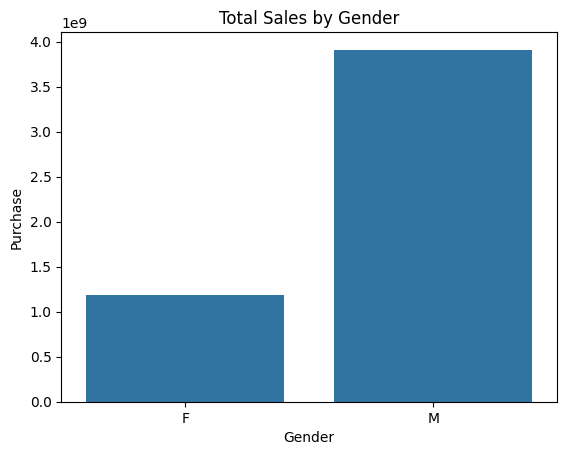

In [439]:
sns.barplot(data = puchsebygen, x = 'Gender', y = 'Purchase')
plt.title('Total Sales by Gender')
plt.show()

In [440]:
puchsebyms = df.groupby('Marital_Status').sum(numeric_only = True).reset_index()
puchsebyms 

,Marital_Status,Purchase
0,0,3008927447
1,1,2086885295


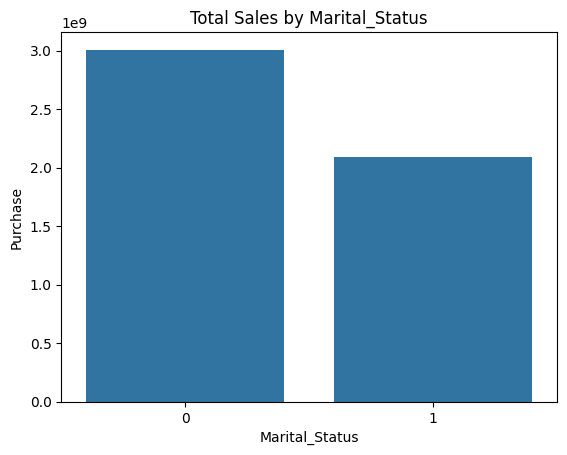

In [441]:
sns.barplot(data = puchsebyms, y = 'Purchase', x = 'Marital_Status')
plt.title('Total Sales by Marital_Status')
plt.show()

In [442]:
puchsebyage = df.groupby('Age').sum(numeric_only = True).reset_index()
puchsebyage

,Age,Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


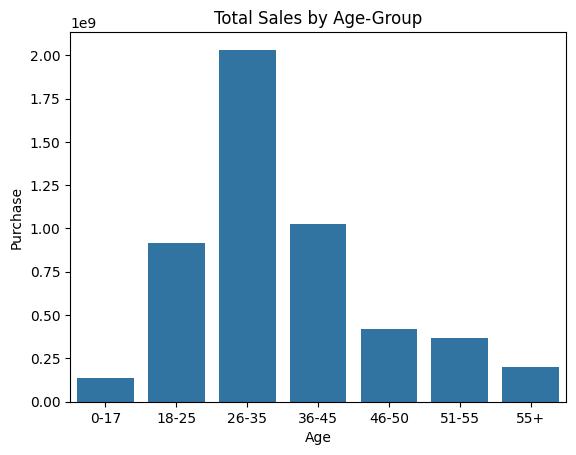

In [443]:
sns.barplot(data = puchsebyage, x = 'Age', y = 'Purchase')
plt.title('Total Sales by Age-Group')
plt.show()

In [444]:
puchsebyoccp = df.groupby('Occupation').sum(numeric_only = True).reset_index()
puchsebyoccp = puchsebyoccp.sort_values('Purchase', ascending = False, ignore_index = True)
puchsebyoccp['Occupation'] = puchsebyoccp['Occupation'].astype('str')
puchsebyoccp

,Occupation,Purchase
0,4,666244484
1,0,635406958
2,7,557371587
3,1,424614144
4,17,393281453
5,12,305449446
6,20,296570442
7,14,259454692
8,16,238346955
9,2,238028583


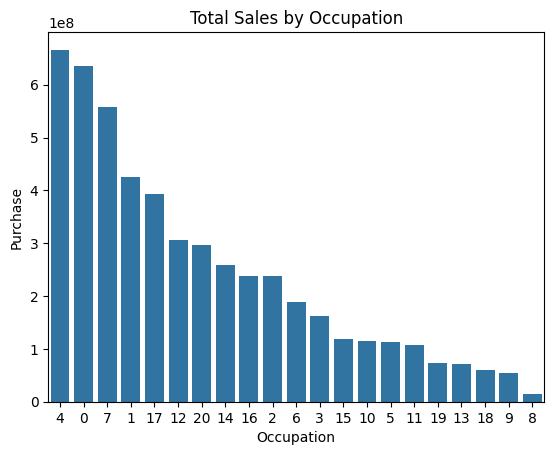

In [445]:
sns.barplot(x = puchsebyoccp['Occupation'], y = puchsebyoccp['Purchase'])
plt.title('Total Sales by Occupation')
plt.show()

In [446]:
puchsebycitycatg = df.groupby('City_Category').sum(numeric_only = True).reset_index()
puchsebycitycatg

,City_Category,Purchase
0,A,1316471661
1,B,2115533605
2,C,1663807476


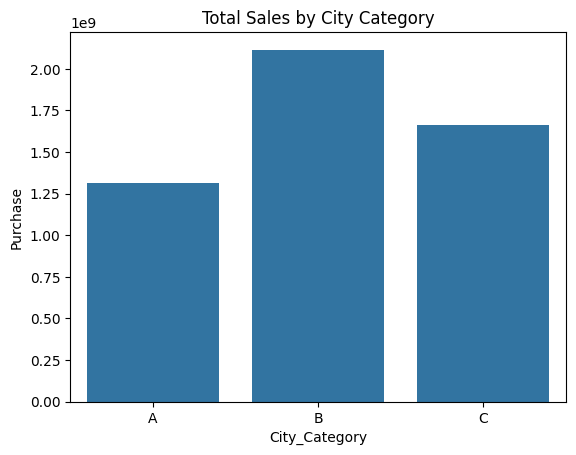

In [447]:
sns.barplot(x = puchsebycitycatg['City_Category'], y = puchsebycitycatg['Purchase'])
plt.title('Total Sales by City Category')
plt.show()

In [448]:
puchsebycrrntcity = df.groupby('Stay_In_Current_City_Years').sum(numeric_only = True).reset_index()
puchsebycrrntcity

,Stay_In_Current_City_Years,Purchase
0,0,682979229
1,1,1792872533
2,2,949173931
3,3,884902659
4,4+,785884390


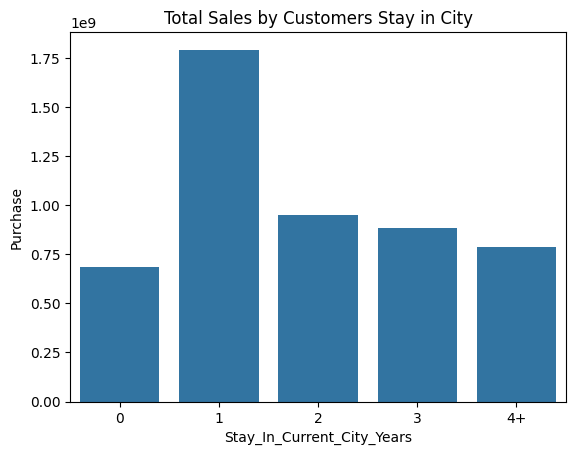

In [449]:
sns.barplot(x = puchsebycrrntcity['Stay_In_Current_City_Years'], y = puchsebycrrntcity['Purchase'])
plt.title('Total Sales by Customers Stay in City')
plt.show()

In [450]:
puhsebyprdtcat = df.groupby('Product_Category').sum(numeric_only = True).reset_index()
puhsebyprdtcat = puhsebyprdtcat.sort_values('Purchase', ascending = False, ignore_index = True)
puhsebyprdtcat['Product_Category'] = puhsebyprdtcat['Product_Category'].astype('str')
puhsebyprdtcat

,Product_Category,Purchase
0,1,1910013754
1,5,941835229
2,8,854318799
3,6,324150302
4,2,268516186
5,3,204084713
6,16,145120612
7,11,113791115
8,10,100837301
9,15,92969042


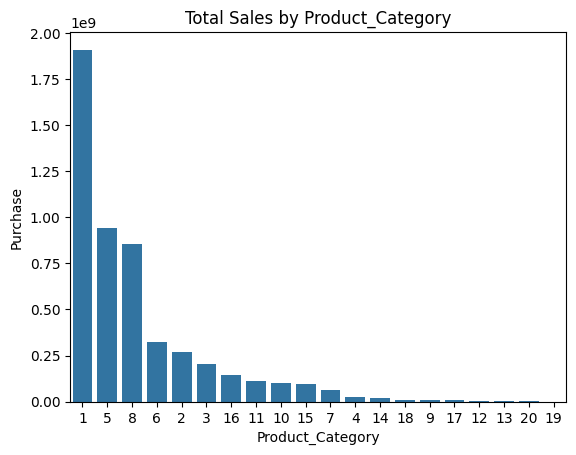

In [451]:
sns.barplot(x = puhsebyprdtcat['Product_Category'], y = puhsebyprdtcat['Purchase'])
plt.title('Total Sales by Product_Category')
plt.show()

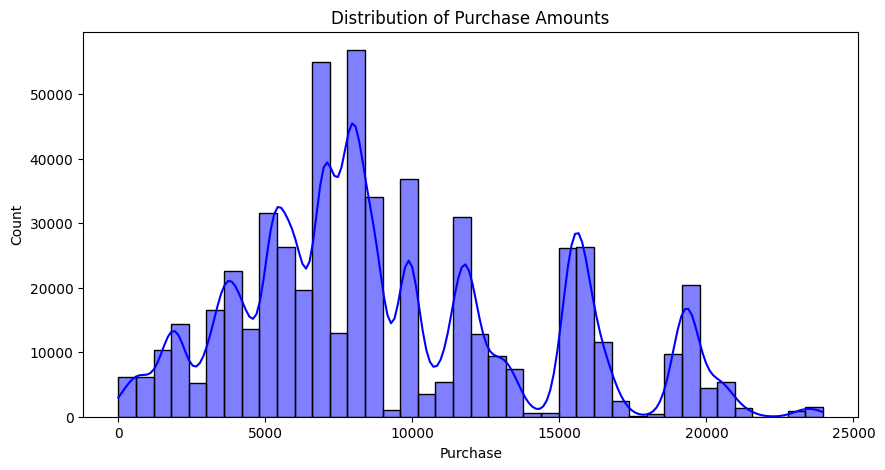

In [452]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of purchase amounts
plt.figure(figsize=(10, 5))
sns.histplot(df['Purchase'], kde=True, bins=40, color='blue')
plt.title('Distribution of Purchase Amounts')
plt.show()


In [453]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [454]:
# Encode 'Age' using ordered encoding
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
df['Age'] = df['Age'].map(age_mapping)

In [455]:
from sklearn.preprocessing import LabelEncoder

# 1. One-hot encoding for 'Gender' and 'City_Category'
df = pd.get_dummies(df, columns=['Gender', 'City_Category'], drop_first=True)

# 2. Label encoding for 'Age'
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])

# 3. Convert 'Stay_In_Current_City_Years' to numeric
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4').astype(int)

# Display the updated DataFrame
df.head()


,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Gender_M,City_Category_B,City_Category_C
0,1000001,P00069042,0,10,2,0,3,8370,False,False,False
1,1000001,P00248942,0,10,2,0,1,15200,False,False,False
2,1000001,P00087842,0,10,2,0,12,1422,False,False,False
3,1000001,P00085442,0,10,2,0,12,1057,False,False,False
4,1000002,P00285442,6,16,4,0,8,7969,True,False,True


In [456]:
df = df.groupby(['User_ID', 'Gender_M', 'Age', 'Occupation', 'City_Category_B','City_Category_C', \
                              'Stay_In_Current_City_Years', 'Marital_Status']).sum(numeric_only = True).reset_index()
df.head()

,User_ID,Gender_M,Age,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,False,0,10,False,False,2,0,334093
1,1000002,True,6,16,False,True,4,0,810472
2,1000003,True,2,15,False,False,3,0,341635
3,1000004,True,4,7,True,False,2,1,206468
4,1000005,True,2,20,False,False,1,1,821001


In [457]:
# Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['User_ID']))
processed_data = pd.DataFrame(scaled_features, columns=df.columns[1:])  # Exclude User_ID

# Display processed data
print(processed_data.head())

   Gender_M       Age  Occupation  City_Category_B  City_Category_C  \
0       0.0  0.000000        0.50              0.0              0.0   
1       1.0  1.000000        0.80              0.0              1.0   
2       1.0  0.333333        0.75              0.0              0.0   
3       1.0  0.666667        0.35              1.0              0.0   
4       1.0  0.333333        1.00              0.0              0.0   

   Stay_In_Current_City_Years  Marital_Status  Purchase  
0                        0.50             0.0  0.027398  
1                        1.00             0.0  0.072810  
2                        0.75             0.0  0.028117  
3                        0.50             1.0  0.015232  
4                        0.25             1.0  0.073813  


In [458]:
df.head(10)

,User_ID,Gender_M,Age,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,False,0,10,False,False,2,0,334093
1,1000002,True,6,16,False,True,4,0,810472
2,1000003,True,2,15,False,False,3,0,341635
3,1000004,True,4,7,True,False,2,1,206468
4,1000005,True,2,20,False,False,1,1,821001
5,1000006,False,5,9,False,False,1,0,379930
6,1000007,True,3,1,True,False,1,1,234668
7,1000008,True,2,12,False,True,4,1,796593
8,1000009,True,2,17,False,True,0,0,594099
9,1000010,False,3,1,True,False,4,1,2169510


In [459]:
df.columns

Index(['User_ID', 'Gender_M', 'Age', 'Occupation', 'City_Category_B',
       'City_Category_C', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Purchase'],
      dtype='object')

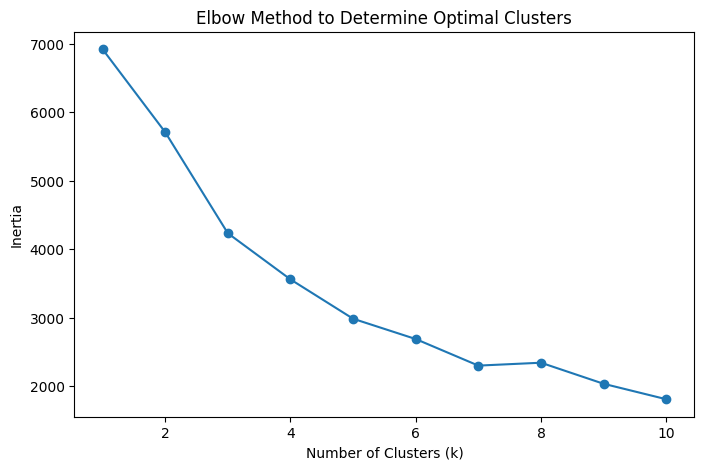

In [460]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different k values
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    inertia.append(kmeans.inertia_)
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [461]:
inertia


[6917.400495393103,
 5707.063157531349,
 4233.218672829393,
 3560.0709419939944,
 2986.3428092172053,
 2690.1454254379114,
 2302.5934585760074,
 2344.7834167443953,
 2037.5175418110396,
 1812.300448851505]

In [462]:
# Set optimal k (e.g., k = 10 based on elbow)
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(processed_data)
df.head()




,User_ID,Gender_M,Age,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years,Marital_Status,Purchase,Cluster
0,1000001,False,0,10,False,False,2,0,334093,7
1,1000002,True,6,16,False,True,4,0,810472,5
2,1000003,True,2,15,False,False,3,0,341635,3
3,1000004,True,4,7,True,False,2,1,206468,2
4,1000005,True,2,20,False,False,1,1,821001,9


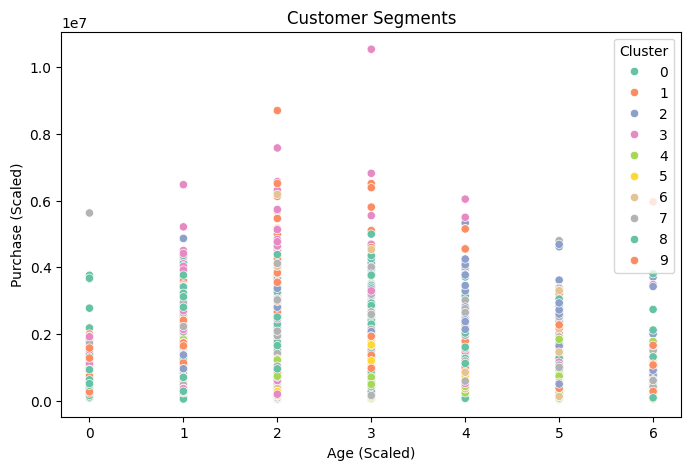

In [463]:
import seaborn as sns

# Scatter plot of clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Purchase', hue='Cluster', palette='Set2')
plt.title('Customer Segments')
plt.xlabel('Age (Scaled)')
plt.ylabel('Purchase (Scaled)')
plt.legend(title='Cluster')
plt.show()


In [464]:
# Summarize clusters
cluster_summary = df.groupby('Cluster').mean()
cluster_summary


,User_ID,Gender_M,Age,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years,Marital_Status,Purchase
Cluster,,,,,,,,,
0,1.003047e+06,0.0,2.321277,6.810638,0.000000,1.000000,1.817021,0.000000,4.342072e+05
1,1.003049e+06,1.0,2.040417,4.131682,0.000000,1.000000,1.882660,0.000000,5.717748e+05
2,1.002994e+06,1.0,2.995902,8.969262,1.000000,0.000000,1.891393,1.000000,1.360899e+06
3,1.002901e+06,1.0,2.103672,8.237581,0.000000,0.000000,1.933045,0.000000,1.363027e+06
4,1.002980e+06,1.0,3.367347,9.087755,0.000000,1.000000,1.884694,1.000000,5.526814e+05
5,1.002926e+06,1.0,2.610687,15.520992,0.000000,1.000000,1.845420,0.000000,5.674479e+05
6,1.003134e+06,0.0,3.305556,6.839286,0.000000,0.789683,1.827381,1.000000,5.977566e+05
7,1.003175e+06,0.0,2.385838,6.300578,0.726879,0.000000,1.848266,0.310694,9.839392e+05
8,1.003053e+06,1.0,2.132682,8.641061,1.000000,0.000000,1.861732,0.000000,1.337706e+06


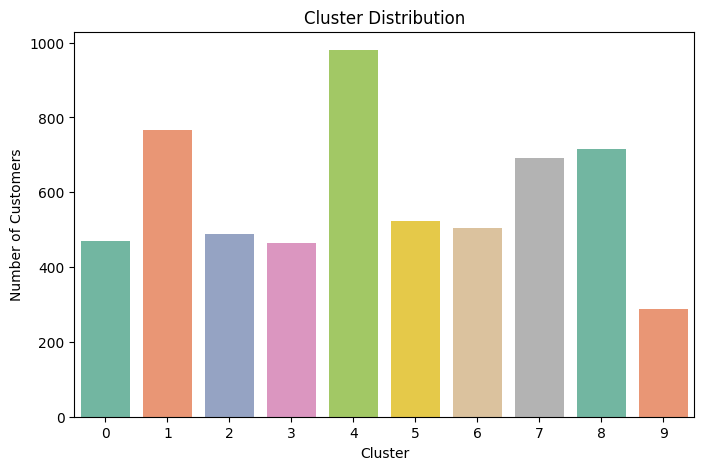

In [465]:
#Cluster Distribution
# Bar plot of cluster sizes
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


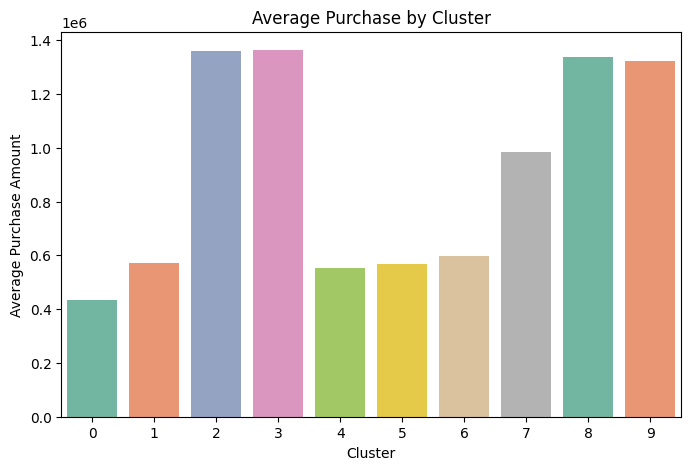

In [466]:
#Spending by Cluster
# Average purchase by cluster
cluster_avg_purchase = df.groupby('Cluster')['Purchase'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_avg_purchase, x='Cluster', y='Purchase', palette='Set2')
plt.title('Average Purchase by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Amount')
plt.show()


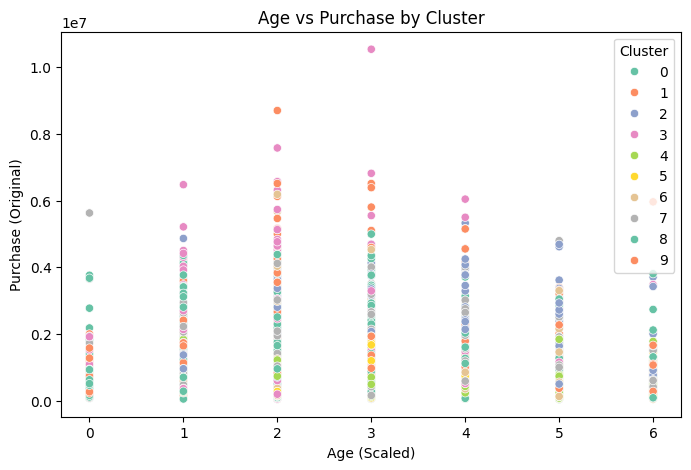

In [467]:
#Age and Purchase Relationship
# Scatter plot of Age vs Purchase
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Purchase', hue='Cluster', palette='Set2')
plt.title('Age vs Purchase by Cluster')
plt.xlabel('Age (Scaled)')
plt.ylabel('Purchase (Original)')
plt.legend(title='Cluster')
plt.show()


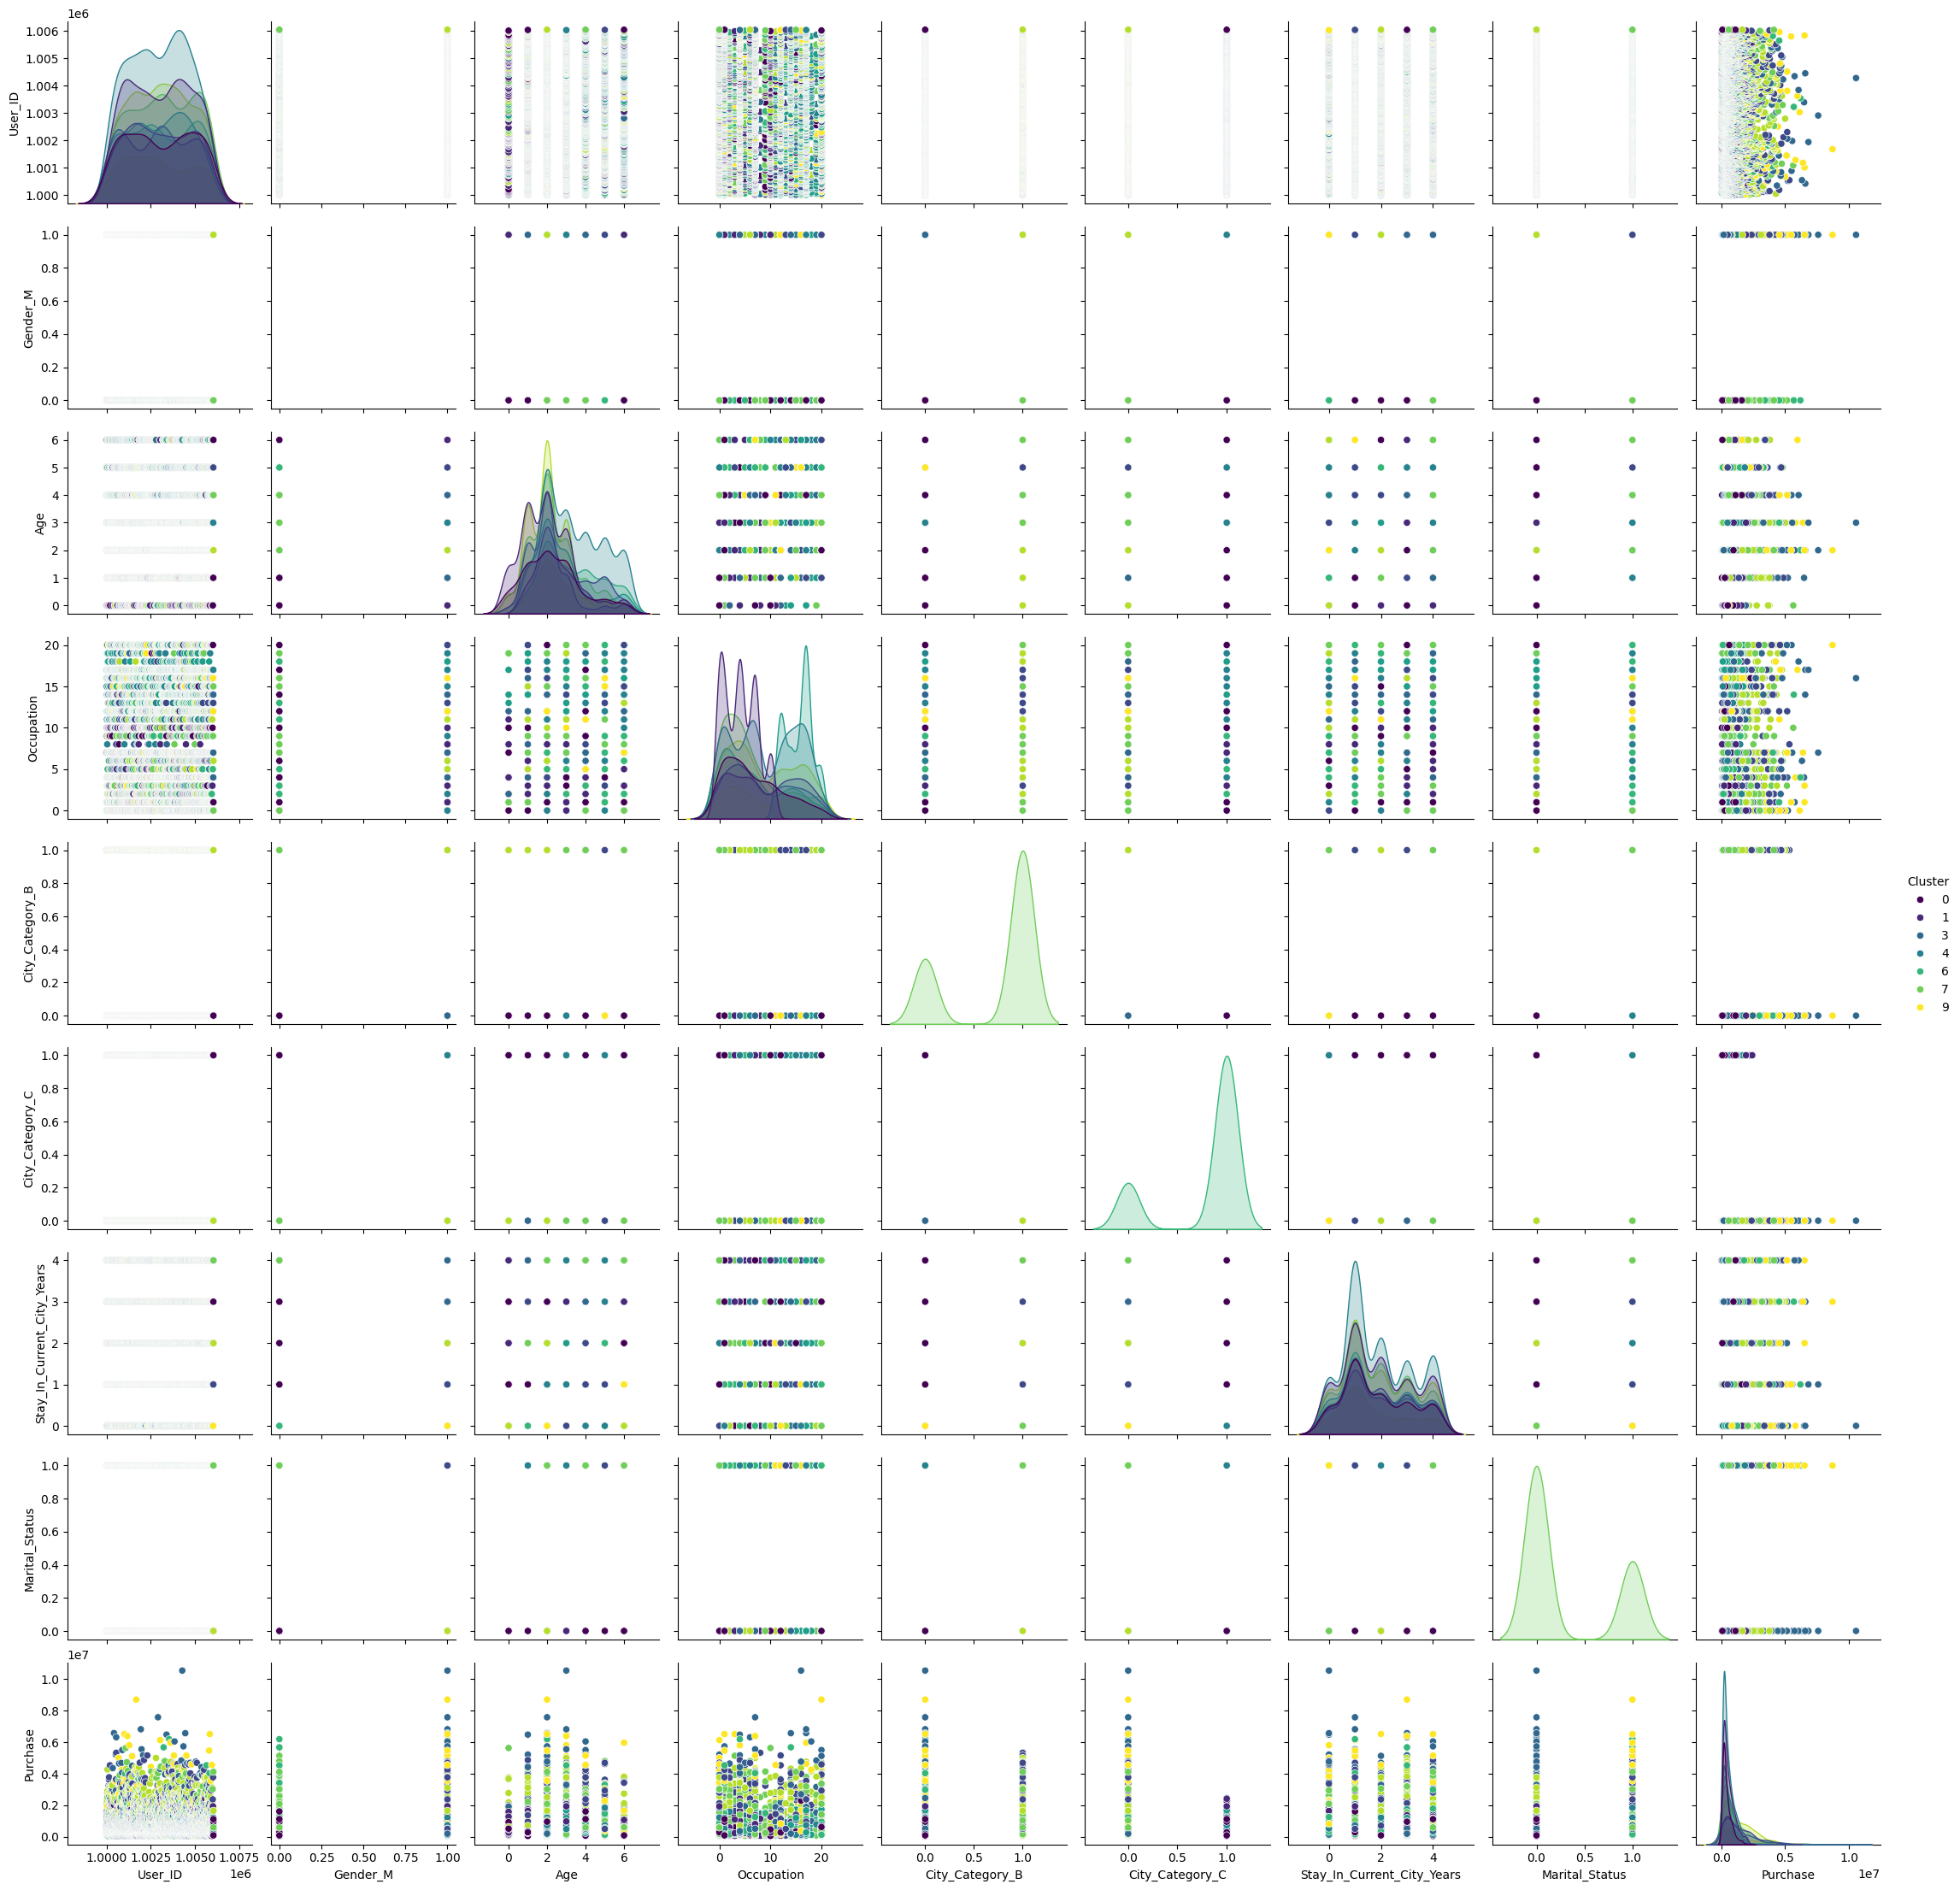

In [468]:
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='viridis')